# Mandy's Credit Risks Project

In [1]:
# first the imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

In [3]:
# then our data, part of the assignment is pulling in arff, there's a few ways to do it i decided to use scipy.io import arff

In [4]:
datasetarff = arff.loadarff('dataset_31_credit-g.arff')

In [5]:
#and see if it looks right
dataset1= pd.DataFrame(datasetarff[0])
dataset1


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b'no checking',12.0,b'existing paid',b'furniture/equipment',1736.0,b'<100',b'4<=X<7',3.0,b'female div/dep/mar',b'none',...,b'real estate',31.0,b'none',b'own',1.0,b'unskilled resident',1.0,b'none',b'yes',b'good'
996,b'<0',30.0,b'existing paid',b'used car',3857.0,b'<100',b'1<=X<4',4.0,b'male div/sep',b'none',...,b'life insurance',40.0,b'none',b'own',1.0,b'high qualif/self emp/mgmt',1.0,b'yes',b'yes',b'good'
997,b'no checking',12.0,b'existing paid',b'radio/tv',804.0,b'<100',b'>=7',4.0,b'male single',b'none',...,b'car',38.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'good'
998,b'<0',45.0,b'existing paid',b'radio/tv',1845.0,b'<100',b'1<=X<4',4.0,b'male single',b'none',...,b'no known property',23.0,b'none',b'for free',1.0,b'skilled',1.0,b'yes',b'yes',b'bad'


 However it didn't look like it imported without issues, but then i realized i'd missed that in the source they had to do some further steps, because it's a different datatype so i needed to decode it.

In [6]:
catCols = [col for col in dataset1.columns if dataset1[col].dtype=="O"]
catCols[:5]

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment']

In [7]:
dataset1[catCols]=dataset1[catCols].apply(lambda x: x.str.decode('utf8'))
# A note is that 


In [8]:
dataset1.head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


Ok!  So I have that imported well, now i'm going to take a look at the dataset from the source at OpenML to read a bit about it and try to decide on features that seem important. 

The full dataset is described as: 

This dataset classifies people described by a set of attributes as good or bad credit risks.

So what columns show that risk most perhaps? Minimum 4 numberic and 3 catagorical.

After looking it over my thoughts are to use

- Target - Class - good or bad only but a good measure of their risk overall
  
- NOMINAL -  credit_history as it shows values regarding paid or delayed, the source states there are 5 distinct values so we may want to change the values from lowest risk to highest risk 1-5 for example in order to use it as a means of measurement? (Values = credits taken, paid back duly, delays, critical accounts)  
- NOMINAL - Other Payment Plans - 3 distinct values
- NOMINAL - Employment - 5 values, often a requirement to get credit
- NOMINAL - property_magnitude - 	4 distinct values - potential collateral so to speak could be relevant

- NUMERIC - Credit amount - how much they currently owe
- NUMERIC - installment_commitment - 4 distinct values shows Installment rate in percentage of disposable income
- NUMERIC - Duration - 33 distinct values, refrencing the duration of their current credit with the bank

In [9]:
#Let's drop the rest of the features we aren't using first.
dataset = dataset1.drop(["checking_status", "purpose", "savings_status", "personal_status", "other_parties","age", "housing", "job", "num_dependents", "own_telephone", "foreign_worker", "existing_credits"], axis = 1)
dataset.head(5)

,duration,credit_history,credit_amount,employment,installment_commitment,residence_since,property_magnitude,other_payment_plans,class
0,6.0,critical/other existing credit,1169.0,>=7,4.0,4.0,real estate,none,good
1,48.0,existing paid,5951.0,1<=X<4,2.0,2.0,real estate,none,bad
2,12.0,critical/other existing credit,2096.0,4<=X<7,2.0,3.0,real estate,none,good
3,42.0,existing paid,7882.0,4<=X<7,2.0,4.0,life insurance,none,good
4,24.0,delayed previously,4870.0,1<=X<4,3.0,4.0,no known property,none,bad


In [10]:
#Ok and I personally prefer my target to be at the beginning so i'm going to move it there with pop insert.
col = dataset.pop('class')
dataset.insert(0, col.name, col)

dataset.head(3)

,class,duration,credit_history,credit_amount,employment,installment_commitment,residence_since,property_magnitude,other_payment_plans
0,good,6.0,critical/other existing credit,1169.0,>=7,4.0,4.0,real estate,none
1,bad,48.0,existing paid,5951.0,1<=X<4,2.0,2.0,real estate,none
2,good,12.0,critical/other existing credit,2096.0,4<=X<7,2.0,3.0,real estate,none


In [11]:
# So what's next?  Are there any NaN or Empty? will definately need to also encode, probably with label for the target and one hot for the catagorical
#let's list our remaining features
list(dataset.columns.values)

['class',
 'duration',
 'credit_history',
 'credit_amount',
 'employment',
 'installment_commitment',
 'residence_since',
 'property_magnitude',
 'other_payment_plans']

In [12]:
# The information in the source states that there are no empty values or instances of empty values, and we didn't see any empty so
# to be thorough i'll just confirm with a quick check
dataset.isna().sum()

class                     0
duration                  0
credit_history            0
credit_amount             0
employment                0
installment_commitment    0
residence_since           0
property_magnitude        0
other_payment_plans       0
dtype: int64

In [13]:
dataset.head(10)
dataset.info()
#dataset.type['credit_amount']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   class                   1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   credit_amount           1000 non-null   float64
 4   employment              1000 non-null   object 
 5   installment_commitment  1000 non-null   float64
 6   residence_since         1000 non-null   float64
 7   property_magnitude      1000 non-null   object 
 8   other_payment_plans     1000 non-null   object 
dtypes: float64(4), object(5)
memory usage: 70.4+ KB


In [14]:
#enc.fit(dataset[["class","credit_history", "employment","property_magnitude", "other_payment_plans"]])
dataset[["class","credit_history", "employment","property_magnitude", "other_payment_plans"]] = enc.fit_transform(dataset[["class","credit_history", "employment","property_magnitude", "other_payment_plans"]])

In [15]:
dataset.head(10)

,class,duration,credit_history,credit_amount,employment,installment_commitment,residence_since,property_magnitude,other_payment_plans
0,1.0,6.0,1.0,1169.0,3.0,4.0,4.0,3.0,1.0
1,0.0,48.0,3.0,5951.0,0.0,2.0,2.0,3.0,1.0
2,1.0,12.0,1.0,2096.0,1.0,2.0,3.0,3.0,1.0
3,1.0,42.0,3.0,7882.0,1.0,2.0,4.0,1.0,1.0
4,0.0,24.0,2.0,4870.0,0.0,3.0,4.0,2.0,1.0
5,1.0,36.0,3.0,9055.0,0.0,2.0,4.0,2.0,1.0
6,1.0,24.0,3.0,2835.0,3.0,3.0,4.0,1.0,1.0
7,1.0,36.0,3.0,6948.0,0.0,2.0,2.0,0.0,1.0
8,1.0,12.0,3.0,3059.0,1.0,2.0,4.0,3.0,1.0
9,0.0,30.0,1.0,5234.0,4.0,4.0,2.0,0.0,1.0


Text(0.5, 1.0, 'Correlation for Credit Risk no scaling')

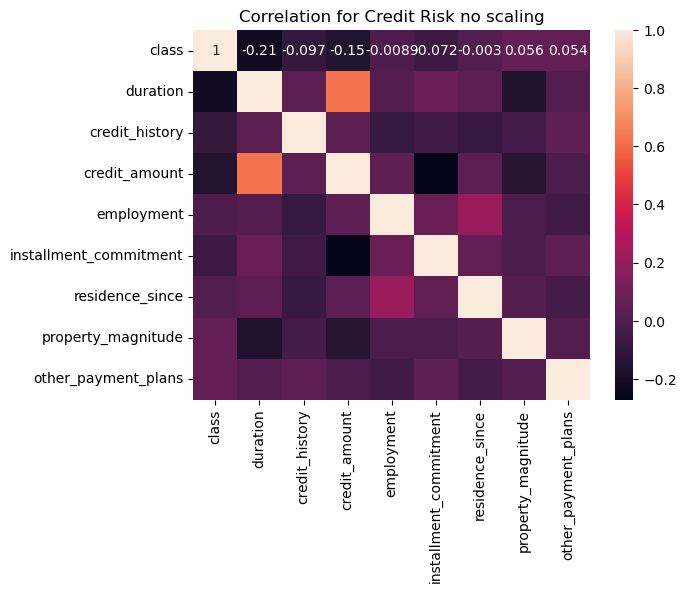

In [16]:
# I probably should do scaling for the credit_amount field or possibly instead weighting might end up being important, 
# let's do a heatmap to see what it looks like
plt.figure()
sns.heatmap(dataset.corr(), annot=True).set_title('Correlation for Credit Risk no scaling')


I'm hesitant to scale this as other than that one feature they are already fairly correlated, I think instead i should use weight to scale JUST the one column likely let's give it a try

In [17]:
dataset['credit_amount'] = dataset['credit_amount']*.01
dataset.head(10)

,class,duration,credit_history,credit_amount,employment,installment_commitment,residence_since,property_magnitude,other_payment_plans
0,1.0,6.0,1.0,11.69,3.0,4.0,4.0,3.0,1.0
1,0.0,48.0,3.0,59.51,0.0,2.0,2.0,3.0,1.0
2,1.0,12.0,1.0,20.96,1.0,2.0,3.0,3.0,1.0
3,1.0,42.0,3.0,78.82,1.0,2.0,4.0,1.0,1.0
4,0.0,24.0,2.0,48.70,0.0,3.0,4.0,2.0,1.0
5,1.0,36.0,3.0,90.55,0.0,2.0,4.0,2.0,1.0
6,1.0,24.0,3.0,28.35,3.0,3.0,4.0,1.0,1.0
7,1.0,36.0,3.0,69.48,0.0,2.0,2.0,0.0,1.0
8,1.0,12.0,3.0,30.59,1.0,2.0,4.0,3.0,1.0
9,0.0,30.0,1.0,52.34,4.0,4.0,2.0,0.0,1.0


Text(0.5, 1.0, 'Single Feature Scaled')

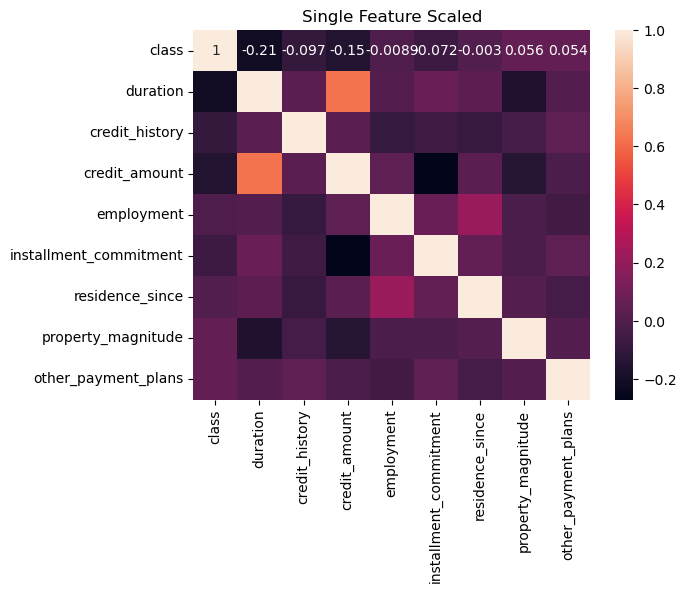

In [18]:
# And take another look at it here.
plt.figure()
sns.heatmap(dataset.corr(), annot=True).set_title('Single Feature Scaled')

In [19]:
# Should i further scale the two larger fields now possibly to see a better representation? Testing
dataset['credit_amount'] = dataset['credit_amount']*.1
dataset['duration'] = dataset['duration']*.1
dataset.head(10)

,class,duration,credit_history,credit_amount,employment,installment_commitment,residence_since,property_magnitude,other_payment_plans
0,1.0,0.6,1.0,1.169,3.0,4.0,4.0,3.0,1.0
1,0.0,4.8,3.0,5.951,0.0,2.0,2.0,3.0,1.0
2,1.0,1.2,1.0,2.096,1.0,2.0,3.0,3.0,1.0
3,1.0,4.2,3.0,7.882,1.0,2.0,4.0,1.0,1.0
4,0.0,2.4,2.0,4.870,0.0,3.0,4.0,2.0,1.0
5,1.0,3.6,3.0,9.055,0.0,2.0,4.0,2.0,1.0
6,1.0,2.4,3.0,2.835,3.0,3.0,4.0,1.0,1.0
7,1.0,3.6,3.0,6.948,0.0,2.0,2.0,0.0,1.0
8,1.0,1.2,3.0,3.059,1.0,2.0,4.0,3.0,1.0
9,0.0,3.0,1.0,5.234,4.0,4.0,2.0,0.0,1.0


Text(0.5, 1.0, 'Duration and Credit Amount Scaled')

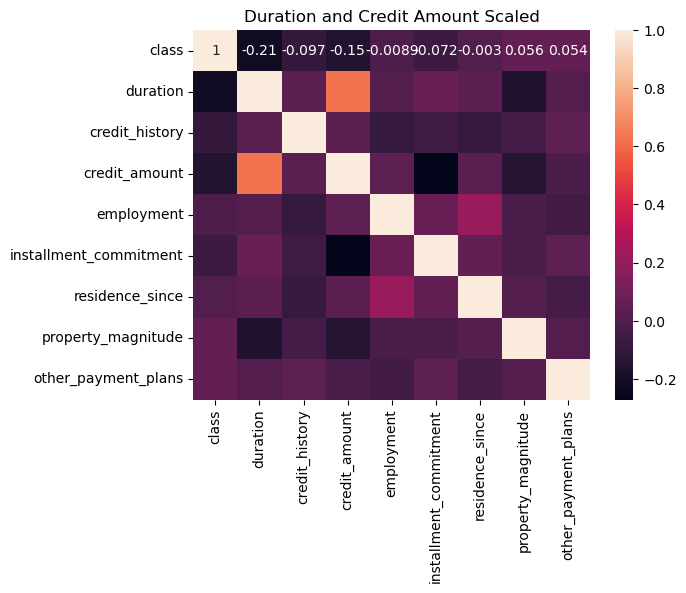

In [20]:
# And take another look at it here.
plt.figure()
sns.heatmap(dataset.corr(), annot=True).set_title('Duration and Credit Amount Scaled')

To be honest the correlation doesn't appear different to me I thought it would more so, I would say after this testing probably don't need to scale after all?  I'll ask in next class though to see if there's considerations i've possibly missed also!  Ok so next train test split and models!

In [21]:
encoded_y = dataset.iloc[:, 0].values
encoded_x = dataset.iloc[:, 1:9].values

# train is now 80% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(encoded_x, encoded_y, test_size=0.2)

# test is now 10% of the initial data set
# validation is now 10% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=.5) 

# uncomment to see if you want below, just tidying
#print(X_train, X_val, X_test)


In [22]:
# Now the instructions say KNN and hyperparameter, i'm not sure if i recall hyperparameter or if that is the iteration
# to find the best?  I read up a bit at https://medium.com/@agrawalsam1997/hyperparameter-tuning-of-knn-classifier-a32f31af25c7  

In [23]:
# Following a bit on that to try to learn this
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 8)
(100, 8)
(800,)
(100,)


In [24]:
# it looks like it's the iteration but also maybe setting 3 starting points to test with maybe?
train_score = {}
test_score = {}
n_neighbors = np.arange(2, 30, 1)
for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_score[neighbor]=knn.score(X_train, y_train)
    test_score[neighbor]=knn.score(X_test, y_test)

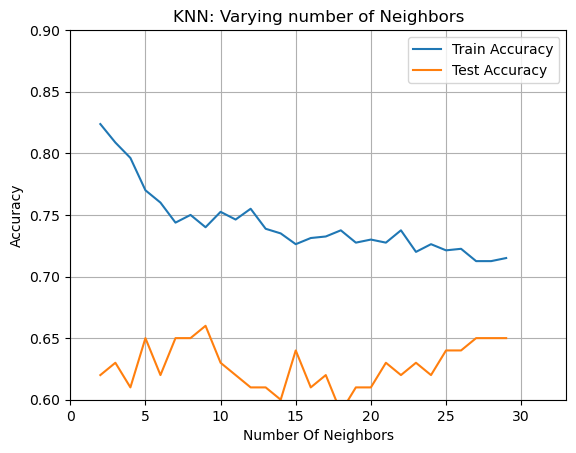

In [25]:
# And then it looks like it's comparing?
plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
plt.xlim(0, 33)
plt.ylim(0.60, 0.90)
plt.grid()
plt.show()

###  Very neat!  I think that i want to ask a bit of questions here but overall i think  this is a way of testing how many neighbours i should use and based on the results it appears to be 2 or 3? I'll compare that with how i tested in my other project also here

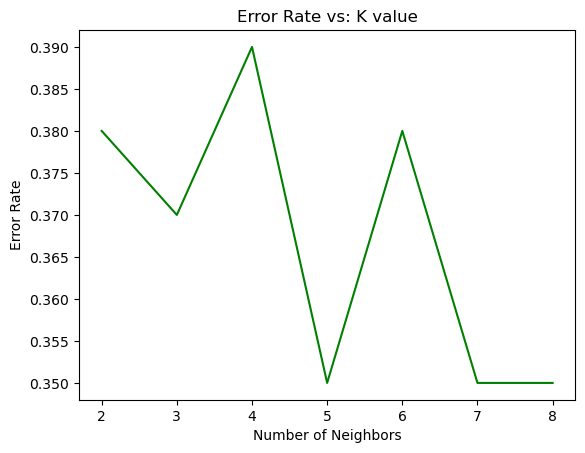

In [26]:
# Make a loop to run a range of nearest neighbours to find the best model starting small

err_rate = []
accuracy = []

for i in range(2,9):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    predictions_i = knn.predict(X_test)
    
    err_rate.append(np.mean(predictions_i != y_test))
    accuracy.append(knn.score(X_test, y_test))
   
#let's visualize it with a plot too ** Keep in mind this is using error rate where above just for testing instead we used accuracy
plt.figure()

plt.plot(range(2,9), err_rate, color ="green" )
plt.title("Error Rate vs: K value")
plt.xlabel("Number of Neighbors")
plt.ylabel("Error Rate")

plt.show()

In [27]:
#interesting sometimes it shows me 2 sometimes 3, however I do note then when it chooses 3 it is a much lower score
#therefore I believe 2 is my best n_neighbour choice
min(err_rate)

0.35

In [28]:
min(err_rate)
best_knn = err_rate.index(min(err_rate)) + 1 #Could use 'min(err_rate)' instead of hardcoding 0.07 
print(best_knn)

4


In [29]:
# Run the best model

best_knn_model = KNeighborsClassifier(n_neighbors = best_knn)
best_knn_model.fit(X_train, y_train)
predictions_best = best_knn_model.predict(X_test)

print(best_knn_model.score(X_test, y_test))

0.61


In [30]:
print(confusion_matrix(y_test, predictions_best))

[[12 24]
 [15 49]]


In [31]:
#last step which i haven't done before is validating performance on the validation set. (Using KNN)
#If I understand this correctly i do the same but with my n_neighbour now set to 2 specificaly and the validation set (X_val, y_val)  
# ** Please let me know if I did this part wrong as my first time doing this part!

In [32]:
validation_model = KNeighborsClassifier(n_neighbors = 4)
validation_model.fit(X_val, y_val)
#therefore I believe 4 is my best n_neighbour choice.fit(X_val, y_val)

KNeighborsClassifier(n_neighbors=4)

In [33]:
validation_predictions = validation_model.predict(X_test)

In [34]:
print(confusion_matrix(y_val, validation_predictions))

[[ 6 15]
 [16 63]]


Technically this should be at the end as the "Challenge yourself" but in my brain it fit well here and i wanted to see the comparison

In [35]:
#let's try SVC with RBF to compare?
# Create an instance of 'svm_model' with the RBF Kernel

svm_model = SVC(max_iter = 1000,
               kernel = "rbf",
               C= 1.0,
               gamma = 'scale'
               ) # max_iter is not required, but can prevent crashing when models don't converge as the default is unlimited iterations
svm_model.fit(X_train, y_train) 

C:\Users\hyppi\anaconda3\envs\notebook2\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(max_iter=1000)

In [36]:
# Guess what, time to do the predictions!
predictions = svm_model.predict(X_test)
svm_model.score(X_test,y_test)

0.67

In [37]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 7 29]
 [ 4 60]]
              precision    recall  f1-score   support

         0.0       0.64      0.19      0.30        36
         1.0       0.67      0.94      0.78        64

    accuracy                           0.67       100
   macro avg       0.66      0.57      0.54       100
weighted avg       0.66      0.67      0.61       100



#### So most of the times i ran it seemed like 4 was the most accurate (occasionally 3) so my final model will be build with 4

### Final model with chosen n_neighbor 4

In [38]:
final_model = KNeighborsClassifier(n_neighbors = 4)
final_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [39]:
final_predictions = final_model.predict(X_test)

In [40]:
print(confusion_matrix(y_test, final_predictions))

[[12 24]
 [15 49]]


Text(0.5, 1.0, 'Credit Risk Predictions')

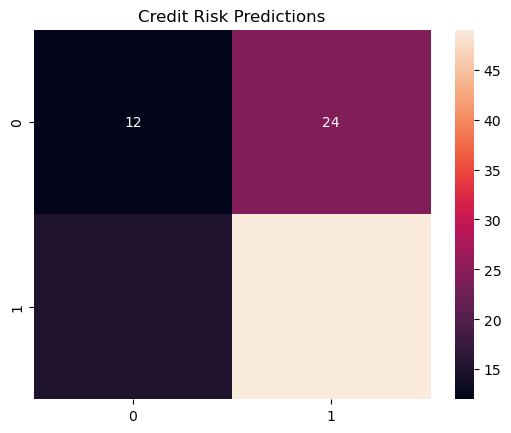

In [41]:
sns.heatmap(confusion_matrix(y_test,final_predictions), annot = True).set_title("Credit Risk Predictions")